In [1]:
# 라이브러리 import
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping

# 데이터 로드
total = pd.read_csv("df_total1.csv")

# 필요없는 열 제거
total2 = total.iloc[:,4:]

# 입력변수와 출력 변수 분리
X = total2.drop(columns=['경계발령',"유해남조류 세포수 (cells/㎖)"])
y = total2[["경계발령"]]

# 데이터를 훈련용과 검증용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 스케일링
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 설계
model = Sequential()

model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# EarlyStopping 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), 
                    epochs=1000, batch_size=64, callbacks=[early_stopping])


Epoch 1/1000
59/59 [==============================] - 1s 7ms/step - loss: 0.3904 - accuracy: 0.9239 - val_loss: 0.2012 - val_accuracy: 0.9562
Epoch 2/1000
59/59 [==============================] - 0s 2ms/step - loss: 0.1942 - accuracy: 0.9562 - val_loss: 0.1885 - val_accuracy: 0.9562
Epoch 3/1000
59/59 [==============================] - 0s 2ms/step - loss: 0.1800 - accuracy: 0.9562 - val_loss: 0.1769 - val_accuracy: 0.9562
Epoch 4/1000
59/59 [==============================] - 0s 3ms/step - loss: 0.1653 - accuracy: 0.9562 - val_loss: 0.1602 - val_accuracy: 0.9562
Epoch 5/1000
59/59 [==============================] - 0s 3ms/step - loss: 0.1509 - accuracy: 0.9562 - val_loss: 0.1474 - val_accuracy: 0.9562
Epoch 6/1000
59/59 [==============================] - 0s 2ms/step - loss: 0.1419 - accuracy: 0.9562 - val_loss: 0.1387 - val_accuracy: 0.9562
Epoch 7/1000
59/59 [==============================] - 0s 2ms/step - loss: 0.1368 - accuracy: 0.9562 - val_loss: 0.1347 - val_accuracy: 0.9562
Epoch 

59/59 [==============================] - 0s 3ms/step - loss: 0.1057 - accuracy: 0.9621 - val_loss: 0.1075 - val_accuracy: 0.9647
Epoch 59/1000
59/59 [==============================] - 0s 4ms/step - loss: 0.1057 - accuracy: 0.9623 - val_loss: 0.1070 - val_accuracy: 0.9647
Epoch 60/1000
59/59 [==============================] - 0s 4ms/step - loss: 0.1054 - accuracy: 0.9607 - val_loss: 0.1086 - val_accuracy: 0.9647
Epoch 61/1000
59/59 [==============================] - 0s 2ms/step - loss: 0.1061 - accuracy: 0.9607 - val_loss: 0.1094 - val_accuracy: 0.9626
Epoch 62/1000
59/59 [==============================] - 0s 2ms/step - loss: 0.1042 - accuracy: 0.9634 - val_loss: 0.1059 - val_accuracy: 0.9647
Epoch 63/1000
59/59 [==============================] - 0s 2ms/step - loss: 0.1061 - accuracy: 0.9639 - val_loss: 0.1060 - val_accuracy: 0.9626
Epoch 64/1000
59/59 [==============================] - 0s 3ms/step - loss: 0.1045 - accuracy: 0.9639 - val_loss: 0.1073 - val_accuracy: 0.9669
Epoch 65/1000

In [2]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test accuracy:', accuracy)
print('Test loss: ', loss)

30/30 [==============================] - 0s 2ms/step - loss: 0.1031 - accuracy: 0.9637
Test accuracy: 0.9636752009391785
Test loss:  0.10309097915887833


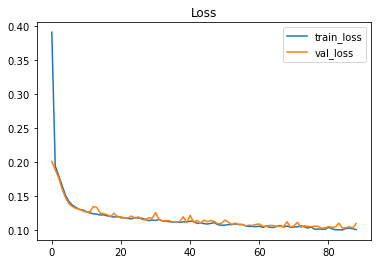

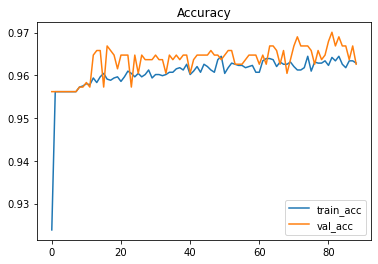

In [3]:
import matplotlib.pyplot as plt

# history 객체에서 손실값과 정확도를 추출합니다.
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# 손실값 그래프
plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.legend()
plt.title('Loss')
plt.show()

# 정확도 그래프
plt.plot(train_acc, label='train_acc')
plt.plot(val_acc, label='val_acc')
plt.legend()
plt.title('Accuracy')
plt.show()
